## Contents:
**1. Import Necessary Libraries**  
**2. Read in and Explore the Data**  
**3. Data Analysis & Data Visualization**  
**4. Cleaning Data**  
**5. Choosing the Best Model**  

### 1) Load Packages

In [1]:
# data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print("PACKAGES IS LOADED")


PACKAGES IS LOADED


### 2) Read in and Explore the Data

In [2]:
train = pd.read_csv("train.csv", encoding= "UTF-8", index_col= 0)
test = pd.read_csv("test.csv", encoding="UTF-8", index_col = 0)
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


3) Data Analysis

In [3]:
print("Train Data 수 :",train.shape)
print("Test Data 수 :", test.shape)
print("칼럼 종류 :",train.columns)


Train Data 수 : (891, 11)
Test Data 수 : (418, 10)
칼럼 종류 : Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
train.sample(5)
# Numberical : Age, Fare, SibSp, Parch
# Categorical : Survived, Sex, Embarked, Pclass
# Alphaunumerical: Ticket, Cabin, Name

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C
731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S
792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C


In [5]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Norman, Mr. Robert Douglas",male,CA. 2343,G6,S
freq,1,577,7,4,644


**문자열 변수**  
Name과 Ticket의 경우, 종류가 다양하며 전처리 어려움 -> 삭제  
Cabin의 경우 na가 많고    
embarked의 경우 s가 다수이다.  

In [7]:
# NA Check
print("train set na 수 :")
print(train.isna().sum()) 

train set na 수 :
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [8]:
print(test.isna().sum()) # del name, ticket, cabin 
# interpolate age, fare, embarked
# sex to dummy


Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


### Data Analysis & Visualization

**1. Age, Cabin, Embarked 칼럼에 있는 NA 처리여부**  
**2. Ticket, Name, Cabin 문자의 의미여부**  
**3. 칼럼들의 유미성 시각화**  
    3-1 : 카테고리 변수  
    3-2 : 숫자 변수

#### Category Variables

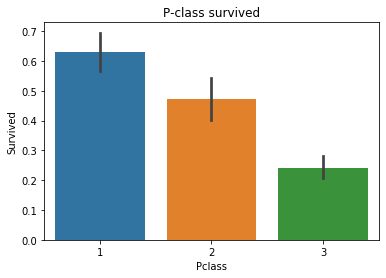

P-Class Numbers
 1    216
2    184
3    491
Name: Pclass, dtype: int64


In [9]:
#1. pclass

sns.barplot(
    data= train,
    x= "Pclass",
    y= "Survived",
    
)
plt.title("P-class survived")
plt.show()
print("P-Class Numbers\n",train['Pclass'].value_counts(sort = False))

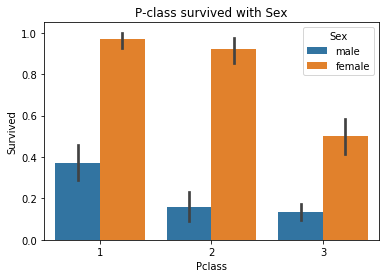

Sex Numbers
 female    314
male      577
Name: Sex, dtype: int64


In [10]:
# Sex
sns.barplot(
    data= train,
    x= "Pclass",
    y= "Survived",
    hue = 'Sex')
plt.title("P-class survived with Sex")
plt.show()
print("Sex Numbers\n",train['Sex'].value_counts(sort = False))

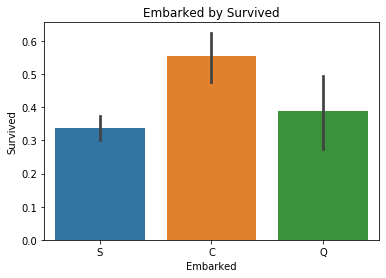

Embarked Numbers
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [11]:
# Embarked
sns.barplot(
    data= train,
    x= "Embarked",
    y= "Survived")
plt.title("Embarked by Survived")
plt.show()
print("Embarked Numbers\n",train['Embarked'].value_counts())

1. P-Class by Survived : P-Class가 높을수록 생존률이 높다.
2. P-Class by Survived with Sex : 성별이 여자인 경우 생존률이 높다. 하지만 P-Class 3등급은 여자도 잘 생존하지 못하였다.
3. Embarked : 유의미성이 크게 차이를 보이지 않지만, c의 경우 더 높은 모습을 보여준다. Pcalss가 1,2인 겨우는 s가 더 많지만 c가 더 생존률이 높게 나온다.

#### Numeric Variables

변수명 :age, fare, sipsp, parch
    1. 분포 확인
    2. age와 생존여부 -> age별 생존여부 histogram?
    3. fare과 생존여부 -> fare별 생존여부 histogram
    4. sipsp과 parch의 상관관계 및 나머지 변수간 heapmap

In [13]:
train.columns


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

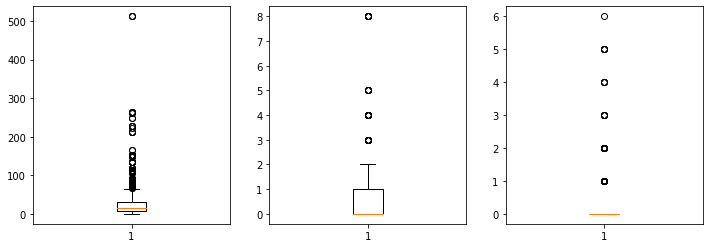

In [14]:
# 1, 분포확인
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.boxplot(train['Fare']) # fare의 경우 outlier가 더 많음
ax2.boxplot(train['SibSp'])# of siblings / spouses aboard the Titanic
ax3.boxplot(train['Parch'])# of parents / children aboard the Titanic
plt.show()


SipSp와 Parch의 경우,평균이나 최저가 0에 가까운 숫자를 보인다.

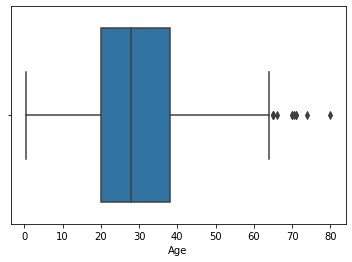

In [15]:

sns.boxplot(x="Age", 
            data=train)

plt.show()

(342, 11)

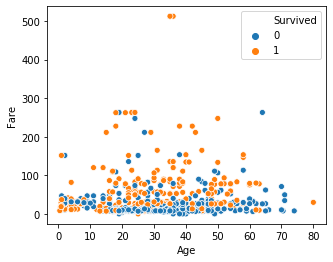

In [17]:
# 2. fare와 age에 따른 생존률의 비교 scatterplot
fig = plt.figure(figsize=(5,4))
sns.scatterplot(x='Age', y="Fare", hue="Survived", data=train)
plt.show()

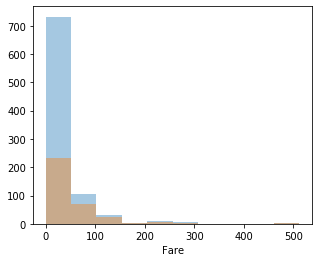

In [18]:
# 2. Fare와 생존률
train_with_survived = train.loc[train['Survived']==1]
train_with_survived.shape
fig = plt.figure(figsize=(5,4))
sns.distplot(train['Fare'],kde = False,bins=10)#, #hue="")o
sns.distplot(train_with_survived['Fare'], kde = False,bins=10)#, #hue="")
plt.show()
#sns.distplot(train)
#sns.distplot(train_to_visual['Age'], hue = 'Survived')#, #hue="")


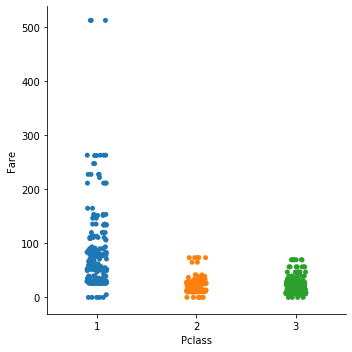

In [19]:
sns.catplot(x="Pclass", y="Fare", data=train)

Histogram을 통해 비교한 결과, 큰 차이를 파악하기 어려웠지만, fare가 높은 사람일수록  
PClass가 높을 확률이 높고 그에 따라서, 생존률이 높았을 가능성이 존재한다.

In [20]:
# Age와 생존률, age의 na를 제거해야한다.
train_to_visual = train[['Survived','Age']].dropna()
train_to_visual_survived = train_to_visual.loc[train_to_visual['Survived']==1]
print("data size\n"+ "na제거 데이터 수: ",train_to_visual.shape, "\n생존인 경우 데이터 수 ",train_to_visual_survived.shape)

data size
na제거 데이터 수:  (714, 2) 
생존인 경우 데이터 수  (290, 2)


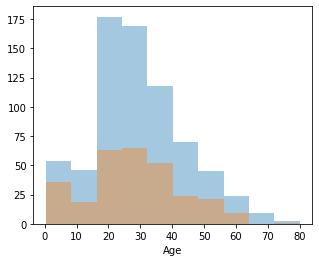

In [21]:
fig = plt.figure(figsize=(5,4))
sns.distplot(train_to_visual['Age'],kde = False,bins=10)#, #hue="")o
sns.distplot(train_to_visual_survived['Age'], kde = False,bins=10)#, #hue="")
plt.show()

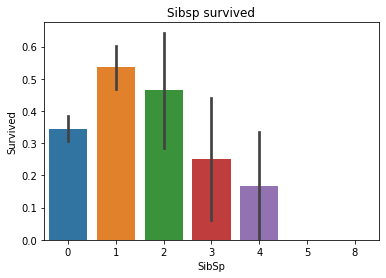

In [22]:
#4. SibSp와 Parch
sns.barplot(
    data= train,
    x= "SibSp",
    y= "Survived",
    
)
plt.title("Sibsp survived")
plt.show()


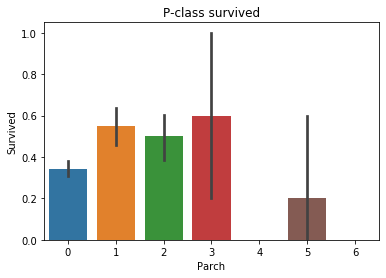

In [93]:
sns.barplot(
    data= train,
    x= "Parch",
    y= "Survived",
    
)
plt.title("Parch survived")
plt.show()


3.5 0.5


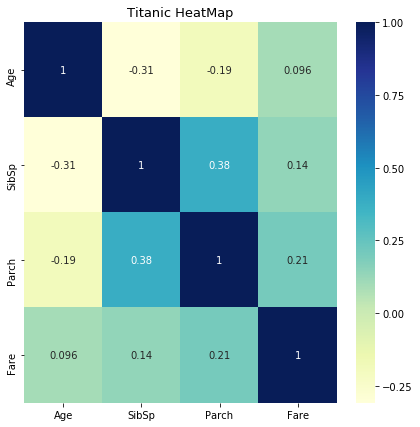

In [23]:
#train[train.columns[1:-2]]
plt.figure(figsize=(7,7))

ax =sns.heatmap(train[['Age', 'SibSp', 'Parch','Fare']].dropna().corr(),cmap='YlGnBu',annot = True,)
buttom,top = ax.get_ylim()
print(buttom,top)
ax.set_ylim(buttom +0.5, top-0.5)
plt.title('Titanic HeatMap', fontsize=13)
plt.show()





숫자변수 간 상관관계는 적다.  
Age나 Fare의 경우 뚜렷하게 survival이랑 연관성은 보이지 않는다  
sibsp의 경우 적을 경우, 생존률이 조금 더 높아 보인다.   

전체적인 Numeric 값들의 의미는 불분명하다.

# CLEANING DATA

1. Name, Ticket, Cabin 등 문자열 데이터 삭제  
2. NA값 MEAN값으로 채우기  
3. Pclass와 Sex, Embarked 더미화 진행  
4. TEST도 동일하게 진행  


In [25]:
# DELETE NAME TICKET, CABIN
del_columns = ['Name', 'Ticket', 'Cabin']
train.drop(del_columns, axis=1, inplace =True)
print("columns is %s" %train.columns)

columns is Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [26]:
# train의 na값을 채운다.
train['Age'].fillna(value = train['Age'].mean(), inplace=True)
print(pd.get_dummies(train['Embarked']).sum()) # so i will choose 'S'
train['Embarked'].fillna(value = 'S', inplace= True)
print("TRAIN NA SUM IS %s" %train.isna().sum().sum())

C    168
Q     77
S    644
dtype: int64
TRAIN NA SUM IS 0


In [27]:
pcl = pd.get_dummies(train['Pclass'], drop_first=True)
sex = pd.get_dummies(train['Sex'], drop_first=True)
emb = pd.get_dummies(train['Embarked'], drop_first=True)

In [28]:
train2 =pd.concat([train, pcl, sex, emb], axis=1)
train2.columns
del_columns2 = ['Pclass', 'Sex', 'Embarked']
train2.drop(del_columns2, axis=1, inplace= True)

In [29]:
y_train = train2['Survived']
y_train
train2.drop(['Survived'], axis=1, inplace =True)


In [31]:
# age, fare 정규화
train2['Age'] = (train2['Age']- train2['Age'].mean())/train2['Age'].std()
#train2['Age'].Describe()
#pd.DataFrame.describe(train2['Age'])
train2['Fare'] = (train2['Fare'] - train2['Fare'].mean())/train2['Fare'].std()
train2.columns
train2.isna().sum()
train2.dtypes


Age      float64
SibSp      int64
Parch      int64
Fare     float64
2          uint8
3          uint8
male       uint8
Q          uint8
S          uint8
dtype: object

In [33]:
train2.describe() # age나 fare가 정규화된것을 파악 할 수 있다.

,Age,SibSp,Parch,Fare,2,3,male,Q,S
count,8.910000e+02,891.000000,891.000000,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000
mean,4.490952e-15,0.523008,0.381594,7.437622e-16,0.206510,0.551066,0.647587,0.086420,0.725028
std,1.000000e+00,1.102743,0.806057,1.000000e+00,0.405028,0.497665,0.477990,0.281141,0.446751
min,-2.251891e+00,0.000000,0.000000,-6.480577e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.921480e-01,0.000000,0.000000,-4.888737e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.371893e-15,0.000000,0.000000,-3.571902e-01,0.000000,1.000000,1.000000,0.000000,1.000000
75%,4.076970e-01,1.000000,0.000000,-2.423274e-02,0.000000,1.000000,1.000000,0.000000,1.000000
max,3.868699e+00,8.000000,6.000000,9.661740e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# 테스트 전처리
test.drop(del_columns, axis=1, inplace = True)
test['Age'].fillna(value = test['Age'].mean(), inplace =True)
test['Fare'].fillna(value = test['Fare'].mean(), inplace = True)
test.isna().sum()
pcl2 = pd.get_dummies(test['Pclass'], drop_first=True)
sex2 = pd.get_dummies(test['Sex'], drop_first=True)
emb2 = pd.get_dummies(test['Embarked'], drop_first=True)

test2 = pd.concat([test, pcl2, sex2, emb2], axis=1)
test2.drop(del_columns2, axis=1, inplace = True)
test2.shape

test2['Age'] = (test['Age'] - test['Age'].mean())/test['Age'].std()
test2['Fare'] = (test['Fare'] - test['Fare'].mean())/ test['Fare'].std()

print(train2.shape, test2.shape, y_train.shape)
print("train columns : %s \ntest columns: %s" %(train2.columns , test2.columns))


(891, 9) (418, 9) (891,)
(418, 9)
train columns : Index(['Age', 'SibSp', 'Parch', 'Fare', 2, 3, 'male', 'Q', 'S'], dtype='object') 
test columns: Index(['Age', 'SibSp', 'Parch', 'Fare', 2, 3, 'male', 'Q', 'S'], dtype='object')


### 5) Choosing the Best Model

In [36]:
# Download Packages
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [38]:
test_tmp = pd.read_csv("gender_submission.csv")
y_test = test_tmp['Survived']
print("test shape check :",test2.shape, y_test.shape)

test shape check : (418, 9) (418,)


In [53]:
# Logistic Regression
a = []
b = []
c = [0.01,0.1, 1, 10]
for i in c:
    log = LogisticRegression(C= i)
    log.fit(train2, y_train)
    a +=[accuracy_score(log.predict(train2), y_train)]
    b +=[accuracy_score(log.predict(test2), y_test)]

print(a)
print(b)

[0.745230078563412, 0.8114478114478114, 0.8047138047138047, 0.8047138047138047]
[0.777511961722488, 0.9401913875598086, 0.9521531100478469, 0.9449760765550239]


In [41]:
#print(confusion_matrix(y_train, log.predict(train2)))
print(classification_report(y_train, log.predict(train2)))


              precision    recall  f1-score   support

           0       0.82      0.87      0.85       549
           1       0.77      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



In [44]:
log1 = LogisticRegression(C=1)
log1.fit(train2, y_train)
accuracy_score(log1.predict(train2), y_train)
accuracy_score(log1.predict(test2), y_test)
#confusion_matrix(log1.predict(test2), y_test)
print(classification_report(log1.predict(test2), y_test))


              precision    recall  f1-score   support

           0       0.97      0.96      0.96       268
           1       0.93      0.94      0.93       150

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



In [45]:
roc_auc_score(log1.predict(test2), y_test)

0.9494776119402986

In [46]:
d= []
e = []
f = [3,5,7,2]
for i in f:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(train2, y_train) 
    d +=[accuracy_score(neigh.predict(train2), y_train)]
    e +=[accuracy_score(neigh.predict(test2), y_test)]
print(d)
print(e)


[0.8754208754208754, 0.8619528619528619, 0.8428731762065096, 0.8866442199775533]
[0.80622009569378, 0.8157894736842105, 0.8349282296650717, 0.7822966507177034]


In [63]:
# Decision Tree
a = []
b = []
c = [3,5, 10]
d = [50, 100]
for i in c:
    for j in d :
        tree = RandomForestClassifier(n_estimators = j, max_depth = i )
        tree.fit(train2, y_train)
        #log.fit(train2, y_train)
        a +=[accuracy_score(tree.predict(train2), y_train)]
        b +=[accuracy_score(tree.predict(test2), y_test)]

print(a)
print(b)

[0.8305274971941639, 0.8316498316498316, 0.8473625140291807, 0.8428731762065096, 0.936026936026936, 0.9382716049382716]
[0.8301435406698564, 0.9234449760765551, 0.9210526315789473, 0.8971291866028708, 0.8779904306220095, 0.8827751196172249]


In [62]:
# SVC
a = []
b = []
c = [0.1, 1, 10,100]
for i in c:
    clf = SVC(kernel ='rbf', C = i)
    clf.fit(train2, y_train)
    #log.fit(train2, y_train)
    a +=[accuracy_score(clf.predict(train2), y_train)]
    b +=[accuracy_score(clf.predict(test2), y_test)]

print(a)
print(b)

[0.8114478114478114, 0.8338945005611672, 0.8484848484848485, 0.8686868686868687]
[0.9449760765550239, 0.9497607655502392, 0.9019138755980861, 0.8564593301435407]


In [66]:
log1 = LogisticRegression(C=1)
log1.fit(train2, y_train)
neigh1 = KNeighborsClassifier(n_neighbors=7)
neigh1.fit(train2, y_train) 
tree1 = RandomForestClassifier(n_estimators = 100, max_depth = 10)
tree1.fit(train2, y_train)
clf1 = SVC(kernel ='rbf', C = 100)
clf1.fit(train2, y_train)
    

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [79]:
# Ensemble
# Train
ensemble_train = log1.predict(train2) + neigh1.predict(train2) +clf1.predict(train2) + tree1.predict(train2)
ensembled_train = np.where(ensemble_train >= 3, 1,0)
accuracy_score(ensembled_train, y_train)

0.8731762065095399

In [81]:
print(classification_report(ensembled_train, y_train))


              precision    recall  f1-score   support

           0       0.96      0.85      0.90       616
           1       0.74      0.92      0.82       275

    accuracy                           0.87       891
   macro avg       0.85      0.89      0.86       891
weighted avg       0.89      0.87      0.88       891



In [82]:
# Test
ensemble_test = log1.predict(test2) + neigh1.predict(test2) +clf1.predict(test2) + tree1.predict(test2)
ensembled_test = np.where(ensemble_test >= 3, 1,0)
accuracy_score(ensembled_test, y_test)

0.8827751196172249

In [85]:
print(classification_report(ensembled_test, y_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       281
           1       0.79      0.88      0.83       137

    accuracy                           0.88       418
   macro avg       0.86      0.88      0.87       418
weighted avg       0.89      0.88      0.88       418



### Conclusion

대표적인 Classificiation기법인 Logistic, KNeighbers, RandomForest, SVC(Supporvector)를 사용하여, 비교분석 및 앙상블 해보았다.
결론적으로 말하면, 결과가 부정적이다.
train의 경우 8% test의 경우 88%의 정확도를 보여준다.
confusion matrix의 경우, 실제로 사망했는데 살았다고 예측하는 경우가 많다.

좋은 결과이면서 안좋은 결과인 이유는 다음과 같다.
1. test가 성능이 더 높을 경우, 보통 Overfitting인 경우가 많다. 하지만 train 정확도가 감소하지 않는 점에서 Overfitting은 아니라고 추측된다.
2. Train의 정확도가 더 높고 Test가 낮은게 일반적인데 역으로 된 것은, 전처리 과정에서 Train에 대한 전처리가 부족하다는 것이다.
3. Overfitting이 아닌데, Prediction 과정에서 정확도 변화가 더 발생하지 않는다. 이는 Fitting을 통해 나아지지 않으면 잘못된 부분이 있다는 것을 보여준다.